<a href="https://colab.research.google.com/github/Sadickachuli/Calculus_assignment-PLD5/blob/main/Quiz_2_PLD5_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Write a dynamic function to find the derivative of any function f(x)

In [4]:
#TO DO: Create a function that does a derivative for any function

# Using sympy to find the derivative
import sympy as sp

def dy_dx(f):
  """
    Computes the derivative of the function with respect to the given variable(x).

    Parameters:
      x: The value of x with sympy
      derivative: We use sympy to differentiate the function f(x).

    Returns:
      The derivative of the function.
    """
  x = sp.symbols('x')
  derivative = sp.diff(f(x), x)

  # Return the derivative
  return derivative


# Task 2: Test the derivative function written with an equation of your choice
*NB: Must have atleast 2 minimas and atleast 2 maximas*

In [5]:
# A derivative function written with our equation

def f(x):
     return x**5 - 10*x**3 + 15*x

    # Find the derivative
derivative = dy_dx(f)

print(derivative)

5*x**4 - 30*x**2 + 15


Testing the derivative function created in Task 1 with an equation that has at least two minima and two maxima.

*Explanation:* We choose the function
$$ 𝑥^5 − 10 𝑥^3 + 15𝑥 $$
because it is a fifth-degree polynomial, which typically has multiple turning points (2 minimas and 2 maximas ).

*Manual Calculation:*

$$ For f(x)=x^5 − 10x^3 + 15x $$

•	The derivative of x^5 is 5x^4.

•	The derivative of −10x^3 is −30x^2.

•	The derivative of 15x is 15.

Therefore, $$ f'(x) = 5x^4 - 30x^2 + 15. $$


#Task 3: Plot a graph of the Equation must have 4 points (2 minimas and 2 maximas)

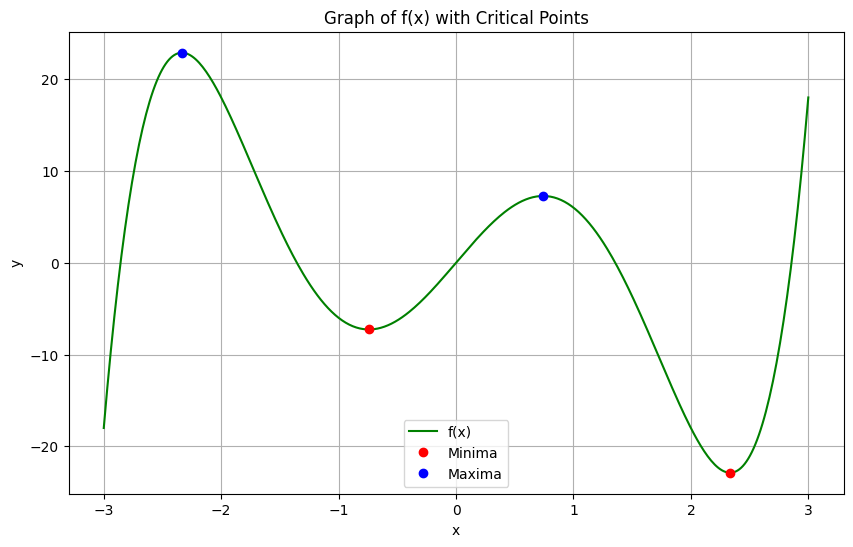

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
x = sp.symbols('x')
f = x**5 - 10*x**3 + 15*x  # We spent a whole day to arrive at this equation for the graph.

# Getting the first derivative
first_derivative = sp.diff(f, x)

# Getting the second derivative
second_derivative = sp.diff(first_derivative, x)

# Find the critical points for points of inflection
critical_points = sp.solve(first_derivative, x)

# Nature of critical points
min_points = []
max_points = []
inflection_points = []

# Now we checked through real critical points, evaluated the second derivative at
# each, and classifies each point as a local minimum (if the second derivative
# is positive), a local maximum (if negative), or a potential inflection point (if zero).
for point in critical_points:
    if point.is_real:
        second_derivative_at_point = second_derivative.subs(x, point)
        if second_derivative_at_point > 0:
            min_points.append(point)
        elif second_derivative_at_point < 0:
            max_points.append(point)
        else:
            inflection_points.append(point)

# Convert symbolic functions to numerical functions using lambdify for plotting
f_numeric = sp.lambdify(x, f, 'numpy')
first_derivative_numeric = sp.lambdify(x, first_derivative, 'numpy')

# Generate x and y values for plotting( same values will be used for the global minima
# and maxima graph obviously)
x_vals = np.linspace(-3, 3, 400)
y_vals = f_numeric(x_vals)
first_derivative_vals = first_derivative_numeric(x_vals)

# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='green')

# Mark critical points
for point in min_points:
    plt.plot(float(point), f_numeric(float(point)), 'ro', label='Minima' if point == min_points[0] else "")
for point in max_points:
    plt.plot(float(point), f_numeric(float(point)), 'bo', label='Maxima' if point == max_points[0] else "")
for point in inflection_points:
    plt.plot(float(point), f_numeric(float(point)), 'go', label='Inflection Point' if point == inflection_points[0] else "")

plt.title('Graph of f(x) with Critical Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


**Our struggles**

We first started off with this equation $$ (x^4 - 6x^2 + 8) $$ which gave us a plot with only one maxima and two minimas. We worked up by changing the polynomials until we got $$(x^5 - 10x^3 + 5x)$$. We had two minimas and two maximas but the local ones were very close together. After that, we worked up to this polynomial $$(x^5 - 10x^3 + 15x)$$. This gave us a clearer difference and steepness between all the minimas and the maximas.

1. $$ f = 𝑥^4 − 6 𝑥^2 + 8 $$

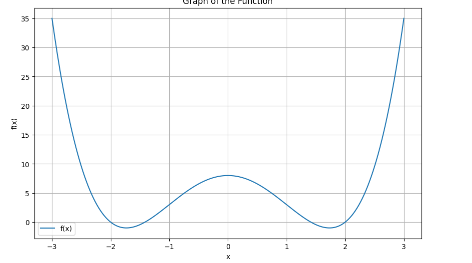

2. $$ 𝑥^5 − 10 𝑥^3 + 5𝑥 $$

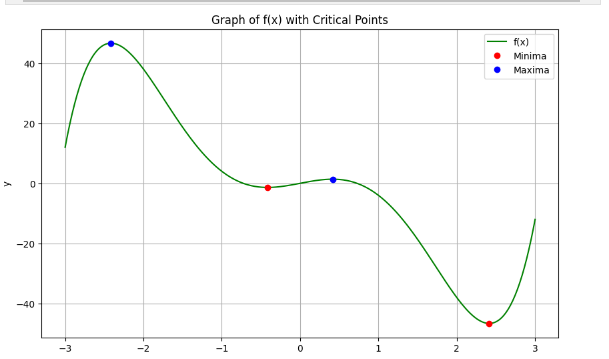

# Task 4: Create separate array of Minimas and maximas

In [7]:
arr_minimas = []
arr_maximas = []
min_points = []
max_points = []
inflection_points = []

for point in critical_points:
    if point.is_real:
        second_derivative_at_point = second_derivative.subs(x, point)
        if second_derivative_at_point > 0:
            min_points.append(point)
            arr_minimas.append((float(point), float(f.subs(x, point))))
        elif second_derivative_at_point < 0:
            max_points.append(point)
            arr_maximas.append((float(point), float(f.subs(x, point))))
        else:
            inflection_points.append(point)

# converting the arrays to 6 decimal points
sixdeci_minimas = [(f'{x:.6f}', f'{y:.6f}') for x, y in arr_minimas]
sixdeci_maximas = [(f'{x:.6f}', f'{y:.6f}') for x, y in arr_maximas]

# Print arrays
print(f'the array of minimas {sixdeci_minimas} and the array of maximas is {sixdeci_maximas}')




the array of minimas [('-0.741964', '-7.269731'), ('2.334414', '-22.872495')] and the array of maximas is [('0.741964', '7.269731'), ('-2.334414', '22.872495')]


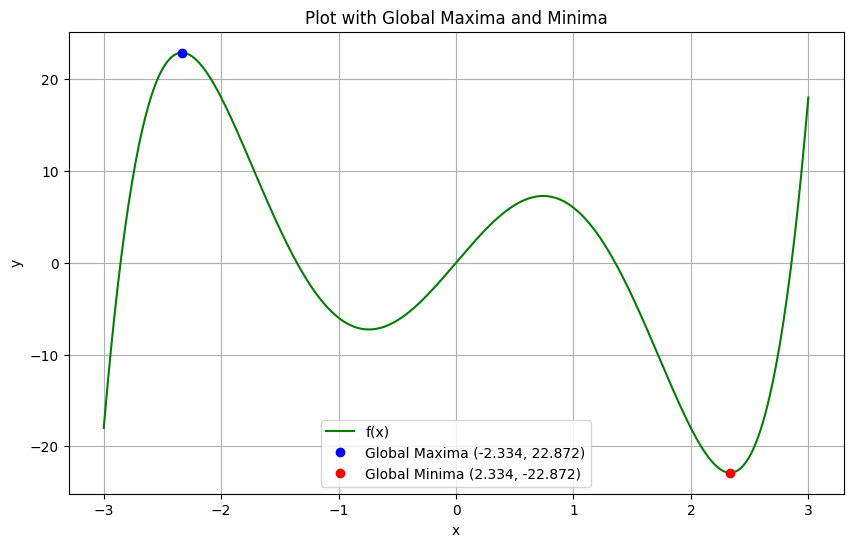

The global maxima is (-2.334, 22.872)
The global minima is (2.334, -22.872)


In [8]:
# Find the min and max point with actual values
max_points_with_values = [(point, f.subs(x, point)) for point in max_points]
min_points_with_values = [(point, f.subs(x, point)) for point in min_points]

# Find the global maxima and minima
global_maxima = max(max_points_with_values, key=lambda item: item[1].evalf())
global_minima = min(min_points_with_values, key=lambda item: item[1].evalf())

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='green')

# Now we just ignored the local ones to only mark global maxima and minima
plt.plot(global_maxima[0], global_maxima[1], 'bo', label=f'Global Maxima ({global_maxima[0]:.3f}, {global_maxima[1]:.3f})')
plt.plot(global_minima[0], global_minima[1], 'ro', label=f'Global Minima ({global_minima[0]:.3f}, {global_minima[1]:.3f})')

plt.title('Plot with Global Maxima and Minima')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print global maxima and minima
print(f'The global maxima is ({global_maxima[0]:.3f}, {global_maxima[1]:.3f})')
print(f'The global minima is ({global_minima[0]:.3f}, {global_minima[1]:.3f})')


#Finally, What is the global Minima and the Global maxima _ Plot this so that I can see

# Things trhat may help

We came up with a functon

$$
f(x) = 4x^2 + x^-1
$$

So we create a fucntion in python



```
def f(x):
  #see our code below
```



In [ ]:
#This is an Example of a quadratic function
def f(x):
   return (4 * (x** 2)) + (x ** -1)

We manuall calculated the derivative  and got that
$$
df(x)/dx = 8x^1 + x^-2
$$

Using the formula above we find points where the derivative is 0

the values are:

$$
x1 = 0.5, x1 = - 0.5,x1 = 0,
$$

If you replace this in our original formula

$$
f(0.5) = 4(0.5)^2 + (0.5^-1 = -1.0
$$
$$
f(0) = 4x^2 + x^-1 = No solution
$$
$$
f(-0.5) = 4x^2 + x^-1 = 1
$$

Meaning our curve is flat at point $$(0.5,1) $$ and at $$ (-0.5,1)$$

Proof Pending........

Here is how we tried with code and got some errors

In [ ]:


x1 = 0.5
x2 = -0.5
x3 = 0

y1 = f(x1)
y2 = f(x2)
y3 = f(x3)

print(y2)
(0.5,3)


ZeroDivisionError: 0.0 cannot be raised to a negative power

# **You can now do the Rest.All the Best ........**